In [2]:
%pip install ydata-profiling seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

# 1. Loading train dataset

train_path = "../data/strat_train_set.csv" 

churning = pd.read_csv(train_path)
print(f"✅ Load dataset successfully, shape: {churning.shape}")

# 2. Generating YData Profiling report

profile = ProfileReport(churning, title="Churn Data Profiling Report", explorative=True)

profile.to_notebook_iframe()

profile.to_file("churn_eda_report.html")
print("✅ EDA generated: churn_eda_report.html")

✅ Load dataset successfully, shape: (8000, 13)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████| 13/13 [00:00<00:00, 1542.63it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

✅ EDA generated: churn_eda_report.html



=== Ranking by correlation with exited ===
exited              1.000000
age                 0.280378
balance             0.121441
estimated_salary    0.020260
tenure             -0.002368
customer_id        -0.011009
has_cr_card        -0.014524
credit_score       -0.033998
num_of_products    -0.054462
is_active_member   -0.152286
Name: exited, dtype: float64


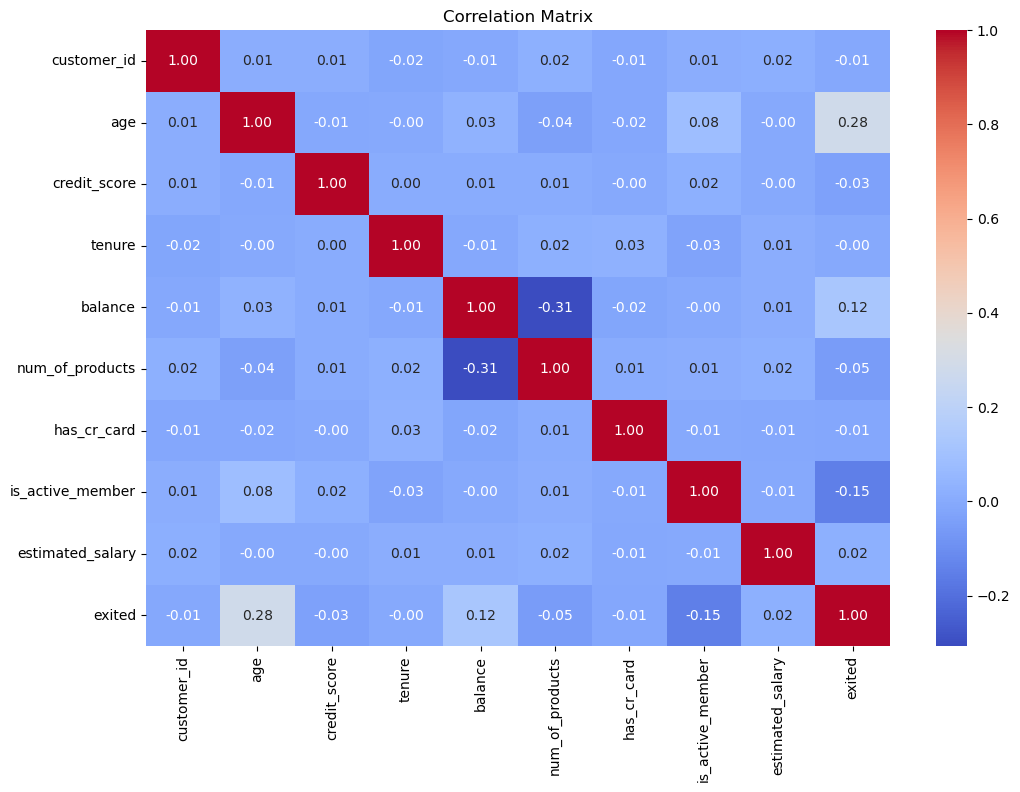

In [6]:
# 3. Calculate Correlation Matrix

%matplotlib inline

corr_matrix = churning.corr(numeric_only=True)

print("\n=== Ranking by correlation with exited ===")
print(corr_matrix["exited"].sort_values(ascending=False))

# 4. Heatmap Visualization of Correlation Matrix

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

1. Data Observations:

Completeness: The dataset is very clean with 0% missing values across all columns. No imputation is strictly necessary for the raw data, but the pipeline should handle potential missing values in future data.

Target Imbalance: The target variable Exited is imbalanced. Only about 20.4% of customers churned (1), while 79.6% stayed (0). Accuracy alone will be a misleading metric; F1-score is required.

High Cardinality/Unused Features:

Surname has 2932 distinct values (high cardinality) and carries no predictive value.

RowNumber and CustomerId are unique identifiers and should be removed.

Zero Balance: About 36.2% of customers have a Balance of 0. This indicates a specific customer segment (likely holding only credit cards or loans without a savings account).

Categorical Features:

Geography: Contains 3 unique values (France ~50%, Germany, Spain). Needs One-Hot Encoding.

Gender: Contains 2 unique values (Male, Female). Needs encoding.

Distributions:

Age: Right-skewed distribution (mean ~38.9, max 92). Older customers appear more likely to churn (based on correlation analysis).

CreditScore: Roughly normal distribution but with a small spike at the lower end.

2. Data Cleanup Tasks:

Based on the EDA observations, the following preprocessing steps are planned:

a. Drop Features: Remove RowNumber, CustomerId, and Surname as they are irrelevant identifiers.

b. Feature Encoding: Apply OneHotEncoder to Geography and Gender to convert them into numerical format.

c. Feature Scaling: Apply StandardScaler to numerical features (CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary) to ensure valid comparisons and faster convergence.

d. Feature Engineering:

Create BalanceSalaryRatio: (Balance / EstimatedSalary) to capture financial health.

Create TenureByAge: (Tenure / Age) to normalize loyalty by customer age.

e. Handling Zeros: Ensure Balance is treated correctly (the model should learn that 0 is a valid state, not missing).